In [31]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import numpy as np
import seaborn as sns


In [3]:
#read the csv file produced in previous notebook
df = pd.read_csv("/Users/niko2485/Library/CloudStorage/OneDrive-UCB-O365/Desktop/EarthScienceCourse/Final project/output/heat_metrics_MarJun_38C.csv")
df.head()


,year,zone_index,zone_name,mean_tmax_MAMJ,p95_tmax_MAMJ,hot_days_ge_38C,onset_doy_ge_38C
0,1980,0,Andaman & Nicobar,29.485012,30.785149,0,NaN
1,1980,1,Andhra Pradesh,36.602806,41.371344,49,83.0
2,1980,2,Assam,28.479902,31.295429,0,NaN
3,1980,3,Chandigarh,34.445499,40.890350,42,110.0
4,1980,4,Dadra and Nagar Haveli,34.332851,38.512435,13,87.0


In [4]:
# Basic exploration
df.describe()
df['zone_name'].unique()


array(['Andaman & Nicobar', 'Andhra Pradesh', 'Assam', 'Chandigarh',
       'Dadra and Nagar Haveli', 'Delhi', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Kerala', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Karnataka', 'Nagaland', 'Orissa',
       'Pondicherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Tripura',
       'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Mizoram',
       'Daman and Diu', 'Goa', 'Bihar', 'Madhya Pradesh', 'Uttar Pradesh'],
      dtype=object)

In [ ]:
# line plot of mean Tmax by zone
df.hvplot.line(
    x="year", y="mean_tmax_MAMJ", groupby="zone_name",
    width=700, height=400, title="Mean Tmax (Mar–Jun) by Zone (Interactive)"
)


BokehModel(combine_events=True, render_bundle={'docs_json': {'89561ccc-49a0-4bb8-94f0-3dc0948c5820': {'version…

In [6]:
df.hvplot.line(
    x="year", y="p95_tmax_MAMJ", groupby="zone_name",
    width=700, height=400, title="95th Percentile Tmax (Mar–Jun)"
)


BokehModel(combine_events=True, render_bundle={'docs_json': {'7b548016-ab6b-4b81-a3ca-3252448aecca': {'version…

In [7]:
df.hvplot.line(
    x="year", y="hot_days_ge_38C", groupby="zone_name",
    width=700, height=400, title="Hot Days ≥38°C"
)


BokehModel(combine_events=True, render_bundle={'docs_json': {'ff4e4340-a4f2-4334-a96b-9aed420d9a9d': {'version…

In [8]:
df.hvplot.line(
    x="year", y="onset_doy_ge_38C", groupby="zone_name",
    width=700, height=400, title="Onset DOY of Extreme Heat"
)


BokehModel(combine_events=True, render_bundle={'docs_json': {'a307cb16-2ce1-46c5-a3ef-7e22fa9fb6de': {'version…

 National-level results

In [20]:
#computing national time series + linear trends
def trend_slope(x, y):
    m, b = np.polyfit(x, y, 1)
    return m  # per year

country_ts = (
    df.groupby("year")[["mean_tmax_MAMJ", "p95_tmax_MAMJ", "hot_days_ge_38C"]]
      .mean()
      .reset_index()
)

# National trends per decade
national_trends = {
    "mean_tmax_per_decade": trend_slope(country_ts["year"], country_ts["mean_tmax_MAMJ"]) * 10,
    "p95_tmax_per_decade": trend_slope(country_ts["year"], country_ts["p95_tmax_MAMJ"]) * 10,
    "hot_days_per_decade": trend_slope(country_ts["year"], country_ts["hot_days_ge_38C"]) * 10,
}

print(pd.DataFrame(national_trends, index=[0]))


   mean_tmax_per_decade  p95_tmax_per_decade  hot_days_per_decade
0              0.038643            -0.052556            -0.455341


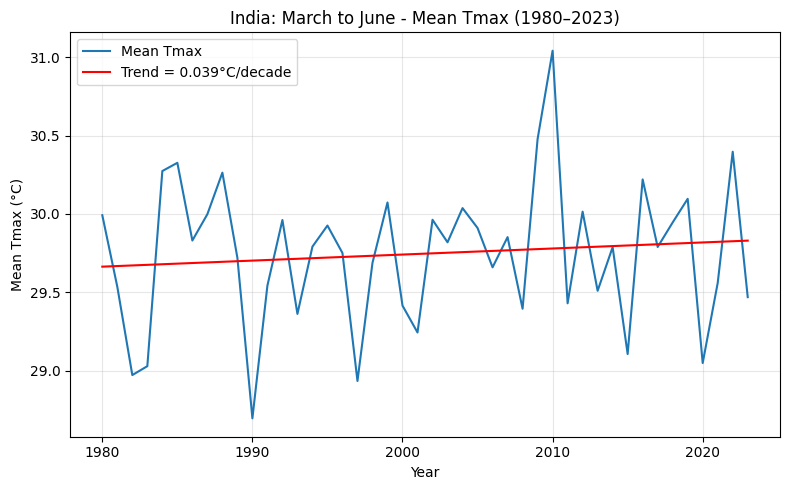

In [22]:
#National mean Tmax w/ trend line
years = country_ts["year"]
vals = country_ts["mean_tmax_MAMJ"]
m, b = np.polyfit(years, vals, 1)
trend = m * years + b

plt.figure(figsize=(8,5))
plt.plot(years, vals, label="Mean Tmax")
plt.plot(years, trend, color="red", label=f"Trend = {m*10:.3f}°C/decade")
plt.title("India: March to June - Mean Tmax (1980–2023)")
plt.xlabel("Year"); plt.ylabel("Mean Tmax (°C)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


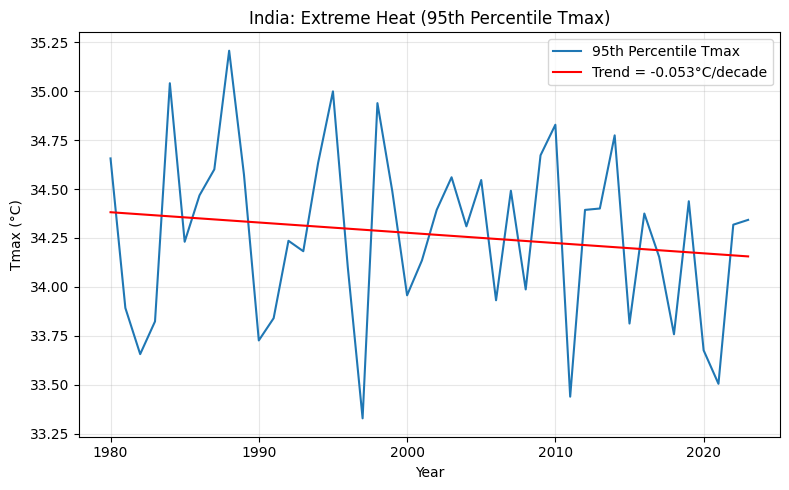

In [23]:
vals = country_ts["p95_tmax_MAMJ"]
m, b = np.polyfit(years, vals, 1)
trend = m * years + b

plt.figure(figsize=(8,5))
plt.plot(years, vals, label="95th Percentile Tmax")
plt.plot(years, trend, color="red", label=f"Trend = {m*10:.3f}°C/decade")
plt.title("India: Extreme Heat (95th Percentile Tmax)")
plt.xlabel("Year"); plt.ylabel("Tmax (°C)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


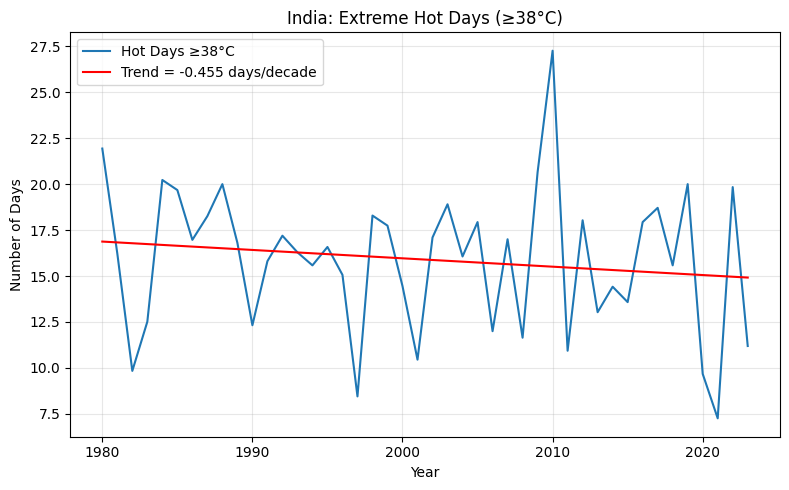

In [24]:
vals = country_ts["hot_days_ge_38C"]
m, b = np.polyfit(years, vals, 1)
trend = m * years + b

plt.figure(figsize=(8,5))
plt.plot(years, vals, label="Hot Days ≥38°C")
plt.plot(years, trend, color="red", label=f"Trend = {m*10:.3f} days/decade")
plt.title("India: Extreme Hot Days (≥38°C)")
plt.xlabel("Year"); plt.ylabel("Number of Days")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


#State level Analysis


In [32]:
zone_trends = []

for zone, sub in df.groupby("zone_name"):
    slope = trend_slope(sub["year"], sub["mean_tmax_MAMJ"]) * 10
    zone_trends.append({"zone_name": zone, "trend_meanTmax_decade": slope})

zone_trends_df = pd.DataFrame(zone_trends)


/var/folders/z3/q2ks8l3j5ld379622q6b9gg40000gp/T/ipykernel_54126/2125733895.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="zone_name", x="trend_meanTmax_decade", data=top_mean, palette="Reds_r")


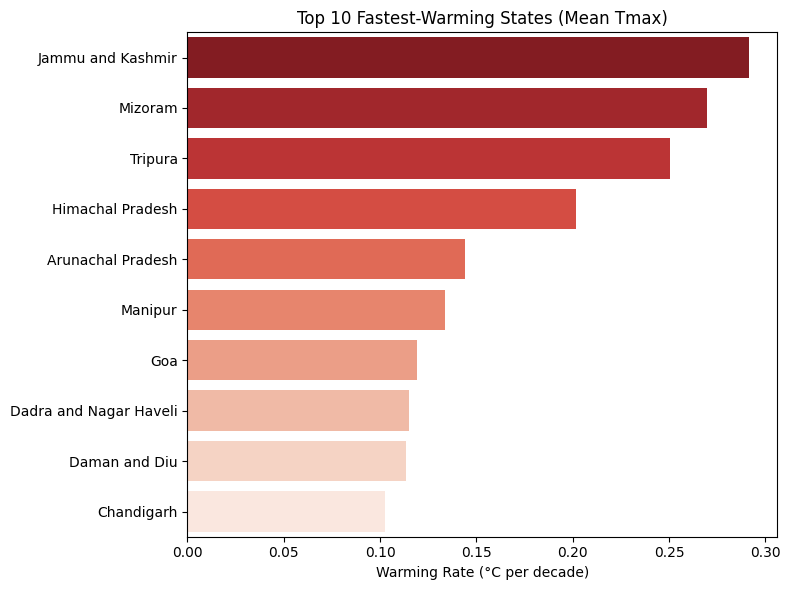

In [33]:
top_mean = zone_trends_df.sort_values("trend_meanTmax_decade", ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(y="zone_name", x="trend_meanTmax_decade", data=top_mean, palette="Reds_r")
plt.title("Top 10 Fastest-Warming States (Mean Tmax)")
plt.xlabel("Warming Rate (°C per decade)")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [34]:
hotday_trends = []

for zone, sub in df.groupby("zone_name"):
    slope = trend_slope(sub["year"], sub["hot_days_ge_38C"]) * 10
    hotday_trends.append({"zone_name": zone, "trend_hotDays_decade": slope})

hotday_df = pd.DataFrame(hotday_trends)


/var/folders/z3/q2ks8l3j5ld379622q6b9gg40000gp/T/ipykernel_54126/2779811372.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="zone_name", x="trend_hotDays_decade", data=top_hotdays, palette="Oranges_r")


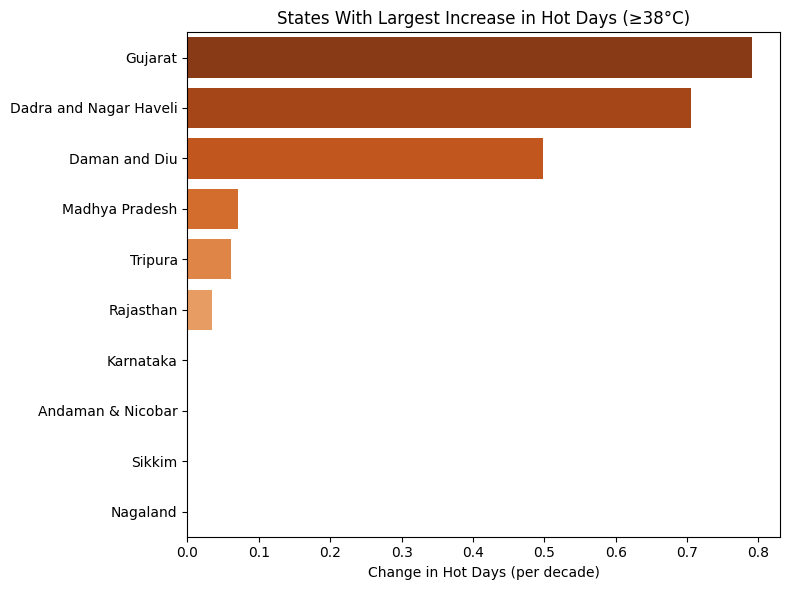

In [35]:
top_hotdays = hotday_df.sort_values("trend_hotDays_decade", ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(y="zone_name", x="trend_hotDays_decade", data=top_hotdays, palette="Oranges_r")
plt.title("States With Largest Increase in Hot Days (≥38°C)")
plt.xlabel("Change in Hot Days (per decade)")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [36]:
onset_trends = []

for zone, sub in df.groupby("zone_name"):
    slope = trend_slope(sub["year"], sub["onset_doy_ge_38C"]) * 10
    onset_trends.append({"zone_name": zone, "onset_shift_days_decade": slope})

onset_df = pd.DataFrame(onset_trends)


/var/folders/z3/q2ks8l3j5ld379622q6b9gg40000gp/T/ipykernel_54126/3545071338.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="zone_name", x="onset_shift_days_decade", data=earliest, palette="Blues_r")


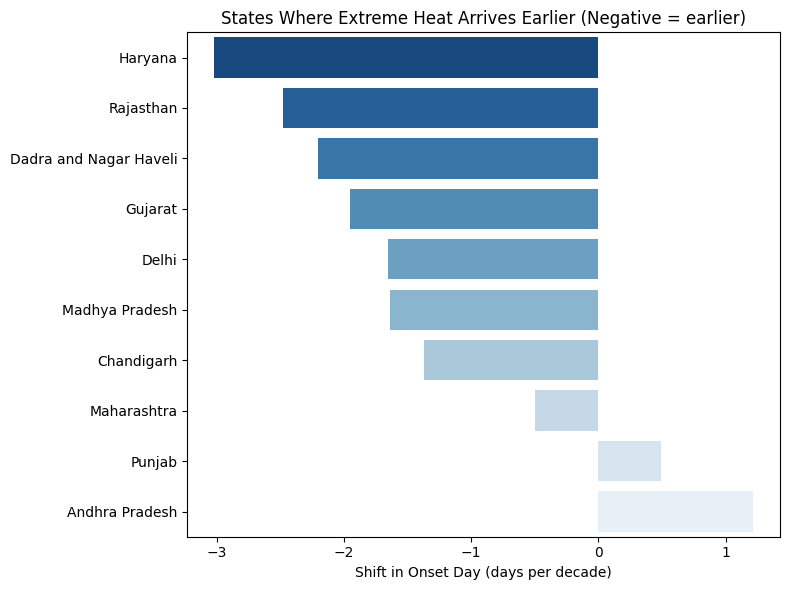

In [37]:
earliest = onset_df.sort_values("onset_shift_days_decade").head(10)

plt.figure(figsize=(8,6))
sns.barplot(y="zone_name", x="onset_shift_days_decade", data=earliest, palette="Blues_r")
plt.title("States Where Extreme Heat Arrives Earlier (Negative = earlier)")
plt.xlabel("Shift in Onset Day (days per decade)")
plt.ylabel("")
plt.tight_layout()
plt.show()
